<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
df1=df[['Employment','JobSat','RemoteWork','CodingActivities']].isnull().sum()
print(df1)
cols=['Employment','JobSat','RemoteWork','CodingActivities']
for col in cols:
    df[col]=df[col].fillna(df[col].mode()[0])
print('\nnumber of Nan:', df[col])

Employment              0
JobSat              36311
RemoteWork          10631
CodingActivities    10971
dtype: int64

number of Nan: 0                                                    Hobby
1        Hobby;Contribute to open-source projects;Other...
2        Hobby;Contribute to open-source projects;Other...
3                                                    Hobby
4                                                    Hobby
                               ...                        
65432                        Hobby;School or academic work
65433             Hobby;Contribute to open-source projects
65434                                                Hobby
65435    Hobby;Contribute to open-source projects;Profe...
65436                                                Hobby
Name: CodingActivities, Length: 65437, dtype: object


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [5]:
df['YearsCodePro']=df['YearsCodePro'].fillna(df['YearsCodePro'].mode()[0])


In [6]:
## Write your code here
df['YearsCodePro']=df['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 year':50
})
df['YearsCodePro']=pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [7]:
bins=[0,5,10,20,float('inf')]
labels=['0-5','5-10','10-20', '>20']
df['ExperienceRange']=pd.cut(df['YearsCodePro'], bins=bins,labels=labels, right=False)

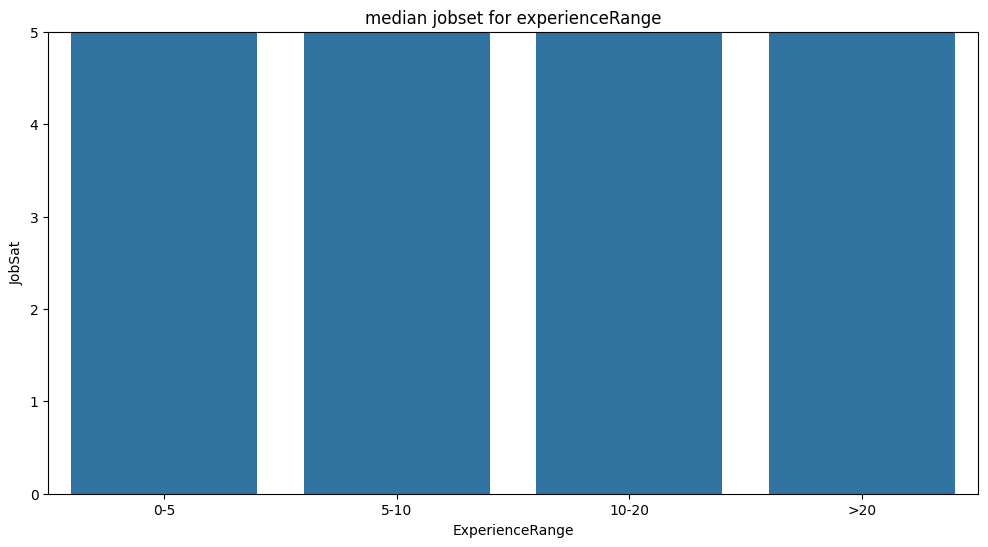

In [38]:
median_job_sat=df.groupby('ExperienceRange',observed=False)['JobSat'].median().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=median_job_sat, x='ExperienceRange',y='JobSat')
plt.title('median jobset for experienceRange')
plt.xlabel('ExperienceRange')
plt.ylabel('JobSat')
plt.ylim(0,5) 
plt.show()

In [9]:
df['JobSat'].isnull().sum()

np.int64(0)

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\chebo\AppData\Local\Temp\ipykernel_5192\2912180495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='viridis')


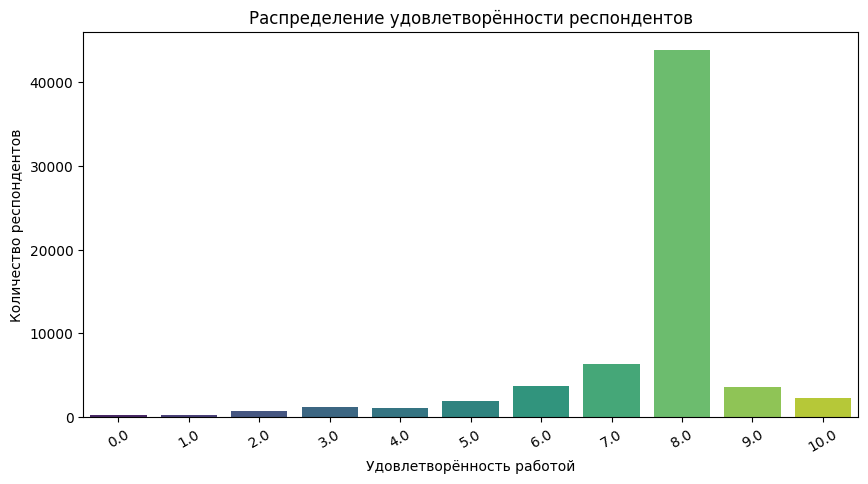

In [10]:
## Write your code here
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='JobSat', palette='viridis')
plt.title('Распределение удовлетворённости респондентов')
plt.xlabel('Удовлетворённость работой')
plt.ylabel('Количество респондентов')
plt.xticks(rotation=30)
plt.show()



#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [11]:
## Write your code here
pd.crosstab(df['RemoteWork'],df['Employment']).transpose()


RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Employment,,,
"Employed, full-time",17296,8552,13193
"Employed, full-time;Employed, part-time",85,32,95
"Employed, full-time;Independent contractor, freelancer, or self-employed",1330,366,1861
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time",80,17,87
"Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired",0,1,0
...,...,...,...
"Student, full-time;Student, part-time;Employed, part-time",4,1,2
"Student, full-time;Student, part-time;Retired",2,0,0
"Student, part-time",494,0,0


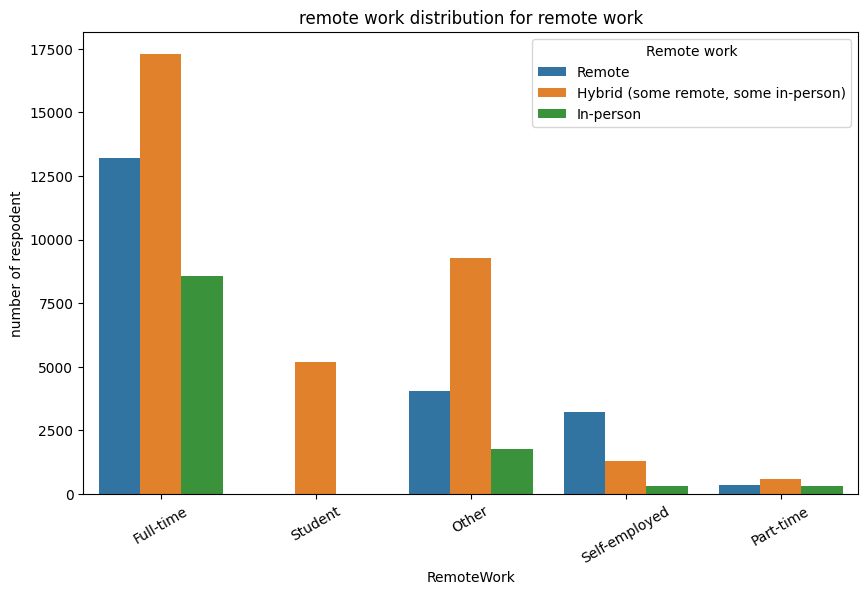

In [12]:
mapping = {
    'Employed, full-time': 'Full-time',
    'Employed, part-time': 'Part-time',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Student, full-time': 'Student',
    'Student, part-time': 'Student'
}

df['Employment_grouped'] = df['Employment'].map(mapping).fillna('Other')

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Employment_grouped', hue='RemoteWork')
plt.title('remote work distribution for remote work')
plt.xlabel('RemoteWork')
plt.ylabel('number of respodent')
plt.legend(title='Remote work')
plt.xticks(rotation=30)
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


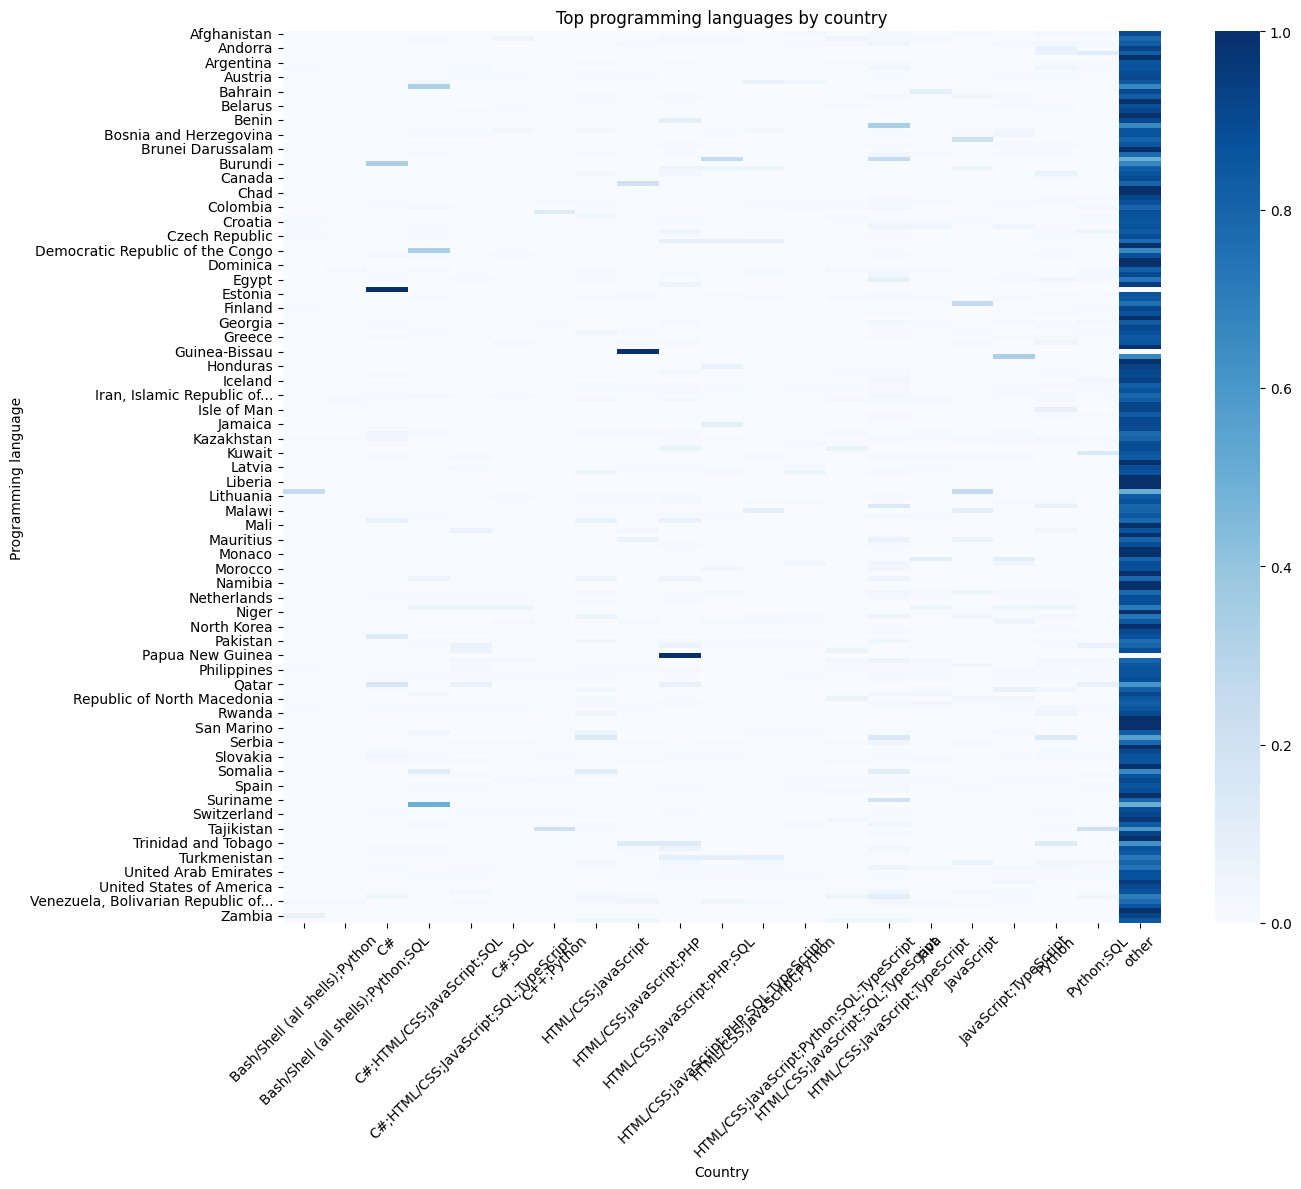

In [33]:
df = df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])
l_count=df['LanguageHaveWorkedWith'].value_counts()
top10=l_count.head(20).index.tolist()
df['Language_group']=df['LanguageHaveWorkedWith'].apply(lambda x:x if x in top10 else 'other')
Lang_Country=pd.crosstab(df['Country'],df['Language_group'],normalize='index')
plt.figure(figsize=(14, 12))

sns.heatmap(
    Lang_Country,
    cmap='Blues'
)
plt.xticks(rotation=45)
plt.title('Top programming languages by country')
plt.xlabel('Country')
plt.ylabel('Programming language')
plt.tight_layout()
plt.show()


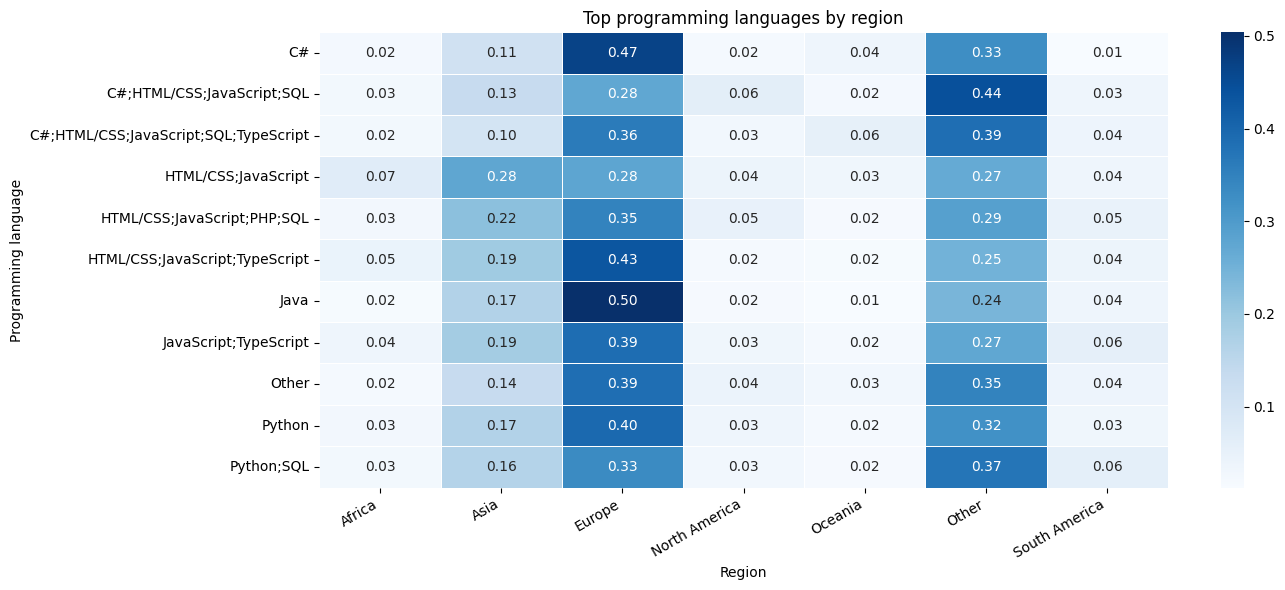

In [35]:

df_lang = df[['LanguageHaveWorkedWith', 'Country']].dropna()
top_languages = (
    df_lang['LanguageHaveWorkedWith']
    .value_counts()
    .head(10)
    .index
)

df_lang['Language_group'] = df_lang['LanguageHaveWorkedWith'].apply(
    lambda x: x if x in top_languages else 'Other'
)
country_to_region = {
    # North America
    'United States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',

    # Europe
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Netherlands': 'Europe',
    'Poland': 'Europe',
    'Sweden': 'Europe',
    'Norway': 'Europe',
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Belgium': 'Europe',
    'Switzerland': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Portugal': 'Europe',
    'Czech Republic': 'Europe',
    'Slovakia': 'Europe',
    'Hungary': 'Europe',
    'Romania': 'Europe',
    'Bulgaria': 'Europe',
    'Ukraine': 'Europe',
    'Russia': 'Europe',

    # Asia
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Indonesia': 'Asia',
    'Thailand': 'Asia',
    'Vietnam': 'Asia',
    'Philippines': 'Asia',
    'Malaysia': 'Asia',
    'Singapore': 'Asia',
    'Pakistan': 'Asia',
    'Bangladesh': 'Asia',
    'Sri Lanka': 'Asia',
    'Nepal': 'Asia',
    'Israel': 'Asia',
    'Turkey': 'Asia',

    # South America
    'Brazil': 'South America',
    'Argentina': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Peru': 'South America',
    'Uruguay': 'South America',

    # Africa
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Kenya': 'Africa',
    'Egypt': 'Africa',
    'Morocco': 'Africa',
    'Tunisia': 'Africa',
    'Ghana': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania'
}

df_lang['Region'] = df_lang['Country'].map(country_to_region).fillna('Other')

lang_region = pd.crosstab(
    df_lang['Language_group'],
    df_lang['Region'],
    normalize='index'
)
plt.figure(figsize=(14, 6))
sns.heatmap(
    lang_region,
    cmap='Blues',
    annot=True,
    fmt='.2f',
    linewidths=0.5
)

plt.title('Top programming languages by region')
plt.xlabel('Region')
plt.ylabel('Programming language')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


-0.030929935721604664


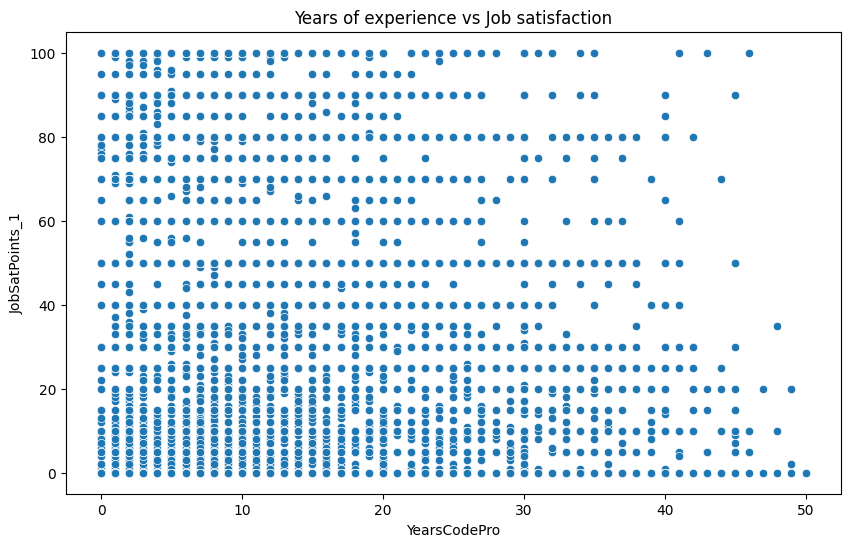

In [39]:
## Write your code here
corr=df['YearsCodePro'].corr(df['JobSatPoints_1'])
print(corr)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1')
plt.title('Years of experience vs Job satisfaction')
plt.xlabel('YearsCodePro')
plt.ylabel('JobSatPoints_1')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


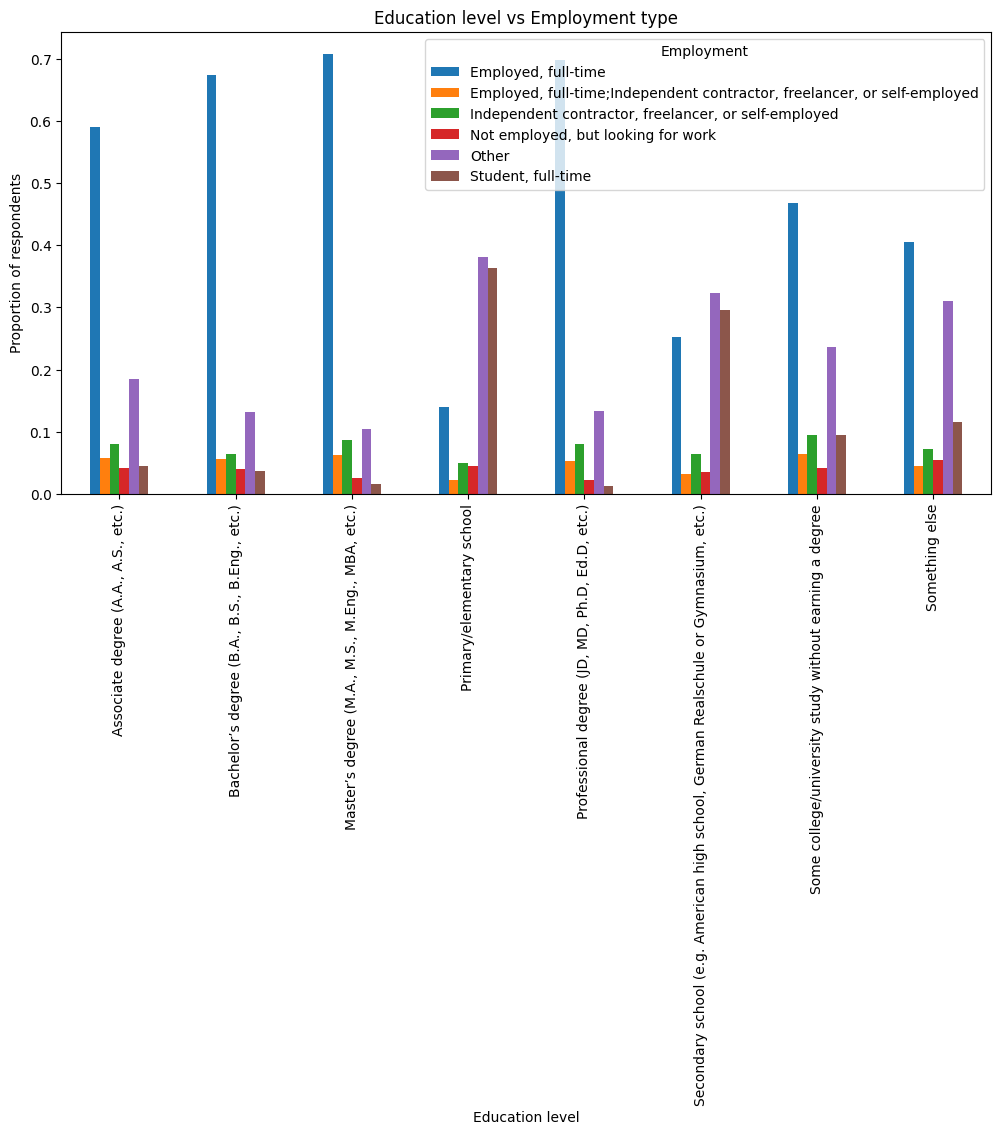

In [57]:
## Write your code here
counts = df['Employment'].value_counts()
top_categories = counts.head(5).index.tolist()

df['Employment_grouped'] = df['Employment'].apply(lambda x: x if x in top_categories else 'Other')

ed_em_cor = pd.crosstab(df['EdLevel'], df['Employment_grouped'], normalize='index')
ed_em_cor.plot(
    kind='bar',
    figsize=(12, 6)
)

plt.title('Education level vs Employment type')
plt.xlabel('Education level')
plt.ylabel('Proportion of respondents')  # Y теперь доля
plt.legend(title='Employment')
plt.show()



#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [36]:
## Write your code here
df.to_csv('исследовательский анализ данных.csv', index=False,
    encoding='utf-8')

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
